In [1]:
import numpy as np
import pandas as pd

import os
print(os.listdir("./"))

['glid_search.csv', 'test.csv', 'train_test_split_3crv.csv', 'train.csv', '.ipynb_checkpoints', 'train_test_split.csv', 'gender_submission.csv', 'titanic.ipynb']


In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
gender_submission = pd.read_csv("./gender_submission.csv")

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train.shape)
print(test.shape)
print(gender_submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [5]:
print(train.columns)
print("-" * 10)
print(test.columns)
print(set(train.columns) - set(test.columns))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
----------
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
{'Survived'}


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_full = pd.concat([train, test], axis=0, sort=False)
print(df_full.shape)
df_full.describe()

(1309, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
df_full.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
10%,131.800000,0.000000,1.000000,14.000000,0.000000,0.000000,7.567500
20%,262.600000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,393.400000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,524.200000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,785.800000,0.000000,3.000000,31.000000,0.000000,0.000000,21.679200


In [10]:
df_full.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [11]:
import pandas_profiling as pdp
import matplotlib
pdp.ProfileReport(train)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

%matplotlib inline

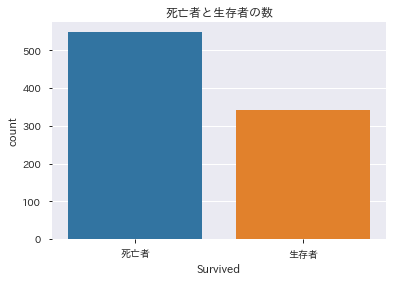

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [13]:
sns.countplot(x='Survived', data=train)
plt.title('死亡者と生存者の数')
plt.xticks([0,1],['死亡者', '生存者'])
plt.show()


print(train['Survived'].value_counts())
print(train['Survived'].value_counts()/len(train['Survived']))

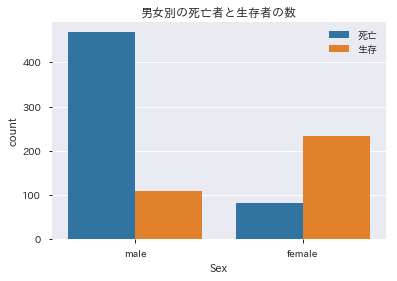

Survived    0    1
Sex               
female     81  233
male      468  109
Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


In [14]:
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("男女別の死亡者と生存者の数")
plt.legend(["死亡", "生存"])
plt.show()

print(pd.crosstab(train['Sex'], train['Survived']))
print(pd.crosstab(train['Sex'], train['Survived'], normalize="index"))

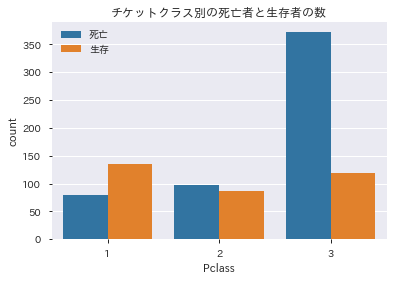

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


In [15]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('チケットクラス別の死亡者と生存者の数')
plt.legend(['死亡', '生存'])
plt.show()

print(pd.crosstab(train['Pclass'], train['Survived']))
print(pd.crosstab(train['Pclass'], train['Survived'], normalize="index"))

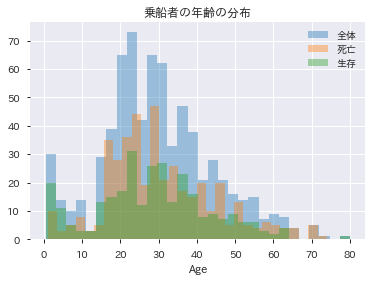

In [16]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30, label="全体")
sns.distplot(train[train['Survived'] == 0].Age.dropna(), kde=False, bins=30, label="死亡")
sns.distplot(train[train['Survived'] == 1].Age.dropna(), kde=False, bins=30, label="生存")
plt.title("乗船者の年齢の分布")
plt.legend()

In [17]:
train['CategoricalAge'] = pd.cut(train['Age'], 8)
print(pd.crosstab(train['CategoricalAge'], train['Survived']))
print(pd.crosstab(train['CategoricalAge'], train['Survived'], normalize="index"))

Survived            0   1
CategoricalAge           
(0.34, 10.368]     26  38
(10.368, 20.315]   71  44
(20.315, 30.263]  146  84
(30.263, 40.21]    86  69
(40.21, 50.158]    53  33
(50.158, 60.105]   25  17
(60.105, 70.052]   13   4
(70.052, 80.0]      4   1
Survived                 0         1
CategoricalAge                      
(0.34, 10.368]    0.406250  0.593750
(10.368, 20.315]  0.617391  0.382609
(20.315, 30.263]  0.634783  0.365217
(30.263, 40.21]   0.554839  0.445161
(40.21, 50.158]   0.616279  0.383721
(50.158, 60.105]  0.595238  0.404762
(60.105, 70.052]  0.764706  0.235294
(70.052, 80.0]    0.800000  0.200000


Text(0.5, 1.0, '同乗している兄弟・配偶者の数')

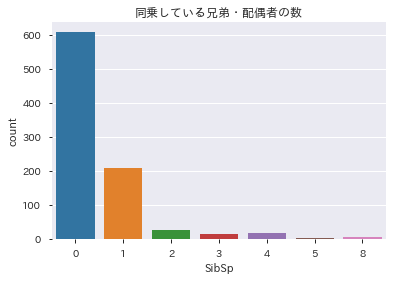

In [18]:
sns.countplot(x="SibSp", data=train)
plt.title("同乗している兄弟・配偶者の数")

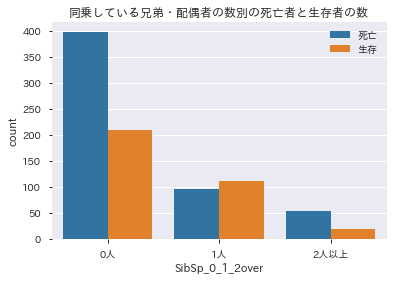

Survived           0    1
SibSp_0_1_2over          
0                398  210
1                 97  112
2                 54   20
Survived                0         1
SibSp_0_1_2over                    
0                0.654605  0.345395
1                0.464115  0.535885
2                0.729730  0.270270


In [19]:
train['SibSp_0_1_2over'] = [i if i <= 1 else 2 for i in train['SibSp']]
sns.countplot(x="SibSp_0_1_2over", hue="Survived", data=train)
plt.legend(["死亡", "生存"])
plt.xticks([0,1,2], ["0人", "1人", "2人以上"])
plt.title("同乗している兄弟・配偶者の数別の死亡者と生存者の数")
plt.show()

print(pd.crosstab(train["SibSp_0_1_2over"], train['Survived']))
print(pd.crosstab(train["SibSp_0_1_2over"], train['Survived'], normalize="index"))

Text(0.5, 1.0, '同乗している両親・子供の数')

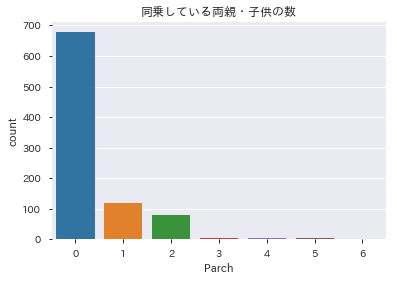

In [20]:
sns.countplot(x="Parch", data=train)
plt.title("同乗している両親・子供の数")

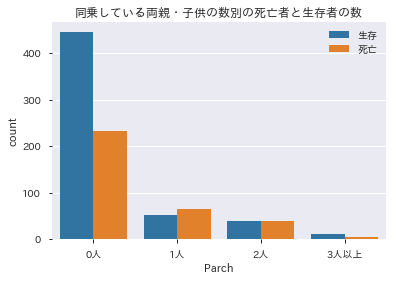

Survived             0    1
Parch_0_1_2_3over          
0                  445  233
1                   53   65
2                   40   40
3                   11    4
Survived                  0         1
Parch_0_1_2_3over                    
0                  0.656342  0.343658
1                  0.449153  0.550847
2                  0.500000  0.500000
3                  0.733333  0.266667


In [21]:
train["Parch_0_1_2_3over"] = [i if i <=2 else 3 for i in train["Parch"]]

sns.countplot(x="Parch_0_1_2_3over", hue="Survived", data=train)
plt.title("同乗している両親・子供の数別の死亡者と生存者の数")
plt.legend(["生存", "死亡"])
plt.xticks([0,1,2,3],['0人', '1人', '2人', '3人以上'])
plt.xlabel("Parch")
plt.show()

print(pd.crosstab(train["Parch_0_1_2_3over"], train['Survived']))
print(pd.crosstab(train["Parch_0_1_2_3over"], train['Survived'], normalize="index"))

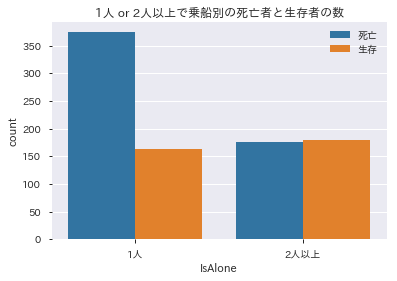

Survived    0    1
IsAlone           
0         374  163
1         175  179
Survived         0         1
IsAlone                     
0         0.696462  0.303538
1         0.494350  0.505650


In [22]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

train['IsAlone'] = 0
train.loc[train['FamilySize'] >= 2, 'IsAlone'] = 1

sns.countplot(x="IsAlone", hue='Survived', data=train)
plt.xticks([0,1], ['1人', '2人以上'])

plt.legend(['死亡', '生存'])
plt.title('1人 or 2人以上で乗船別の死亡者と生存者の数')
plt.show()

print(pd.crosstab(train['IsAlone'], train['Survived']))
print(pd.crosstab(train['IsAlone'], train['Survived'], normalize='index'))

Text(0.5, 1.0, '運賃の分布')

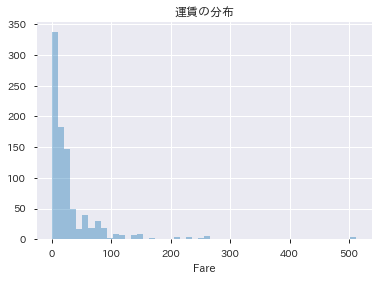

In [23]:
sns.distplot(train['Fare'].dropna(), kde=False, hist=True)
plt.title('運賃の分布')

In [24]:
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean()

print(pd.crosstab(train['CategoricalFare'], train['Survived']))
print(pd.crosstab(train['CategoricalFare'], train['Survived'], normalize="index"))

Survived           0    1
CategoricalFare          
(-0.001, 7.91]   179   44
(7.91, 14.454]   156   68
(14.454, 31.0]   121  101
(31.0, 512.329]   93  129
Survived                0         1
CategoricalFare                    
(-0.001, 7.91]   0.802691  0.197309
(7.91, 14.454]   0.696429  0.303571
(14.454, 31.0]   0.545045  0.454955
(31.0, 512.329]  0.418919  0.581081


In [25]:
train['Name'].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [26]:
set(train.Name.str.extract(' ([A-Za-z]+)\.', expand=False))

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

In [27]:
train.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Lady          1
Sir           1
Don           1
Jonkheer      1
Countess      1
Mme           1
Ms            1
Name: Name, dtype: int64

In [28]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train.groupby('Title').mean()['Age']

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [29]:
def title_to_num(title):
    if title == 'Master':
        return 1
    elif title == 'Miss':
        return 2
    elif title == 'Mr':
        return 3
    elif title == 'Mrs':
        return 4
    else:
        return 5
    
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title_num'] = [title_to_num(title) for title in train['Title']]
test['Title_num'] = [title_to_num(title) for title in test['Title']]

In [30]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

train = pd.get_dummies(train, columns=['Sex', 'Embarked'])
test = pd.get_dummies(test, columns=['Sex', 'Embarked'])

train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [31]:
X_train = train.drop(['Survived'], axis=1)
Y_train = train['Survived']

In [32]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/Users/yuyataki/PycharmProjects/kaggle/venv/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [33]:
train_x, valid_x, train_y, valid_y = train_test_split(X_train, Y_train, test_size=0.33, random_state=0)
gbm = lgb.LGBMClassifier(objective='binary')

In [34]:
gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], early_stopping_rounds=20, verbose=10)

Training until validation scores don't improve for 20 rounds.
[10]	valid_0's binary_logloss: 0.465153
[20]	valid_0's binary_logloss: 0.419539
[30]	valid_0's binary_logloss: 0.40614
[40]	valid_0's binary_logloss: 0.402566
[50]	valid_0's binary_logloss: 0.409918
[60]	valid_0's binary_logloss: 0.415006
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.402566


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [35]:
oof = gbm.predict(valid_x, num_iteration=gbm.best_iteration_)
print('score', round(accuracy_score(valid_y, oof) * 100, 2))

score 81.69


In [36]:
test_pred = gbm.predict(test, num_iteration=gbm.best_iteration_)

In [37]:
sample_submission = pd.read_csv('./gender_submission.csv')

sample_submission['Survived'] = test_pred
sample_submission.to_csv('train_test_split.csv', index=False)

In [38]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
score_list = []
models = []

In [39]:
for fold_, (train_index, valid_index) in enumerate(kf.split(X_train, Y_train)):
    train_x = X_train.iloc[train_index]
    valid_x = X_train.iloc[valid_index]
    train_y = Y_train.iloc[train_index]
    valid_y = Y_train.iloc[valid_index]
    
    print(f'fold{fold_ + 1} start')
    
    gbm = lgb.LGBMClassifier(objective='binary')
    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], early_stopping_rounds=20, verbose=-1)
    
    oof = gbm.predict(valid_x, num_iteration=gbm.best_iteration_)
    score_list.append(round(accuracy_score(valid_y, oof) * 100, 2))
    models.append(gbm)
    print(f'fold{fold_ + 1} end\n')

print(score_list, '平均score', np.mean(score_list))

fold1 start
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.468911
fold1 end

fold2 start
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.427376
fold2 end

fold3 start
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.382065
fold3 end

[81.48, 82.49, 84.18] 平均score 82.71666666666667


In [40]:
test_pred = np.zeros((len(test), 3))

for fold_, gbm in enumerate(models):
    pred_ = gbm.predict(test, num_iteration=gbm.best_iteration_)
    test_pred[:, fold_] = pred_
    
pred = (np.mean(test_pred, axis=1) > 0.5).astype(int)
sample_submission['Survived'] = pred

sample_submission.to_csv('train_test_split_3crv.csv', index=False)

In [41]:
gbm.get_params

<bound method LGBMModel.get_params of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
gbm = lgb.LGBMClassifier(objective='binary')

params = {
    'max_depth': [2, 3, 4, 5],
    'reg_alpha': [0, 1, 10, 100],
    'reg_lambda': [0, 1, 10, 100],
}

grid_search = GridSearchCV(gbm, param_grid=params, cv=3)

grid_search.fit(X_train, Y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.8271604938271605
{'max_depth': 3, 'reg_alpha': 1, 'reg_lambda': 0}


In [44]:
score_list = []
test_pred = np.zeros((len(test), 3))

for fold_, (train_index, valid_index) in enumerate(kf.split(X_train, Y_train)):
    train_x = X_train.iloc[train_index]
    valid_x = X_train.iloc[valid_index]
    train_y = Y_train[train_index]
    valid_y = Y_train[valid_index]
    
    print(f'fold{fold_ + 1} start')
    
    gbm = lgb.LGBMClassifier(objective='binary', max_depth=3, reg_alpha=1, reg_lambda=0)
    
    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], early_stopping_rounds=20, verbose=-1)
    
    oof = gbm.predict(valid_x, num_iteration=gbm.best_iteration_)
    score_list.append(round(accuracy_score(valid_y, oof) * 100, 2))
    test_pred[:, fold_] = gbm.predict(test, num_iteration=gbm.best_iteration_)
    print(f'fold{fold_ + 1} end\n')
print(score_list, '平均score', np.mean(score_list))
pred = (np.mean(test_pred, axis=1) > 0.5).astype(int)
sample_submission['Survived'] = pred
sample_submission.to_csv('glid_search.csv', index=False)

fold1 start
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.453196
fold1 end

fold2 start
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.414269
fold2 end

fold3 start
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[76]	valid_0's binary_logloss: 0.382864
fold3 end

[79.8, 81.48, 83.84] 平均score 81.70666666666666
